# Image Deconvolution
- ver.0.0.1
- 2023 Apr 21
- H. Yoneda
- using 1s GRB simulation data from source_injector.ipynb

In [31]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

from mhealpy import HealpixMap
#from cosipy.image_deconvolution import dataIO
#from cosipy.image_deconvolution import ImageDeconvolution

from image_deconvolution import dataIO
from image_deconvolution import ImageDeconvolution

In [2]:
#event_filepath = "/Users/yoneda/Work/Exp/COSI/cosipy-2/intro_cosipy/data.h5"
#bkg_filepath = "/Users/yoneda/Work/Exp/COSI/cosipy-2/intro_cosipy/bkg.h5"
#response_filepath = "/Users/yoneda/Work/Exp/COSI/cosipy-2/R_and_D/mlem_test/data/FlatContinuumIsotropic.LowRes.binnedimaging.imagingresponse.area.nside8.cosipy.h5"


event_filepath = "/Users/thomassiegert/COSItools/cosipy/cosipy/data.h5"
bkg_filepath = "/Users/thomassiegert/COSItools/cosipy/cosipy/bkg.h5"
response_filepath = "/Users/thomassiegert/python/new_COSIpy/cosipy/cosipy/response/FlatContinuumIsotropic.LowRes.binnedimaging.imagingresponse.area.nside8.cosipy.h5"


duration = 1 * u.s

## load files

- Need the dataIO library for the event and background files

In [3]:
dataloader = dataIO(event_filepath = event_filepath, 
                    bkg_filepath = bkg_filepath, 
                    response_filepath = response_filepath, 
                    duration = duration)

... (DataIOdummy) creating response ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 768/768 [00:44<00:00, 17.14it/s]


... (DataIOdummy) calculationg projected response ...
... (DataIOdummy) dense to sparse ...
... (DataIOdummy) calculationg projected response (sparse) ...


In [4]:
dataloader.response.axes["Ei"].edges

<Quantity [ 100.,  200.,  500., 1000., 2000., 5000.] keV>

In [12]:
dataloader.response.axes.labels

array(['NuLambda', 'Ei', 'Em', 'Phi', 'PsiChi', 'SigmaTau', 'Dist'],
      dtype='<U8')

In [15]:
dataloader.response.axes['Phi'].widths

<Quantity [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
           10., 10., 10., 10., 10.] deg>

## load data

In [16]:
image_deconvolution = ImageDeconvolution()

In [17]:
image_deconvolution.set_data(dataloader)

data for image deconvolution was set ->  <image_deconvolution.dataIO_dummy.dataIO object at 0x107290a60>


## load parameterfile

In [18]:
parameter_filepath = "imagedeconvolution_parfile_itr10.yml"

image_deconvolution.read_parameterfile(parameter_filepath)

parameter file for image deconvolution was set ->  imagedeconvolution_parfile_itr10.yml


## sparse matrix?

In [19]:
image_deconvolution.use_sparse = False

## initialization
- produce an initial flux map etc.

In [20]:
image_deconvolution.initialize()

#### Initialization ####
1. generating a model map
---- parameters ----
energy:
  edges:
  - 100.0
  - 200.0
  - 500.0
  - 1000.0
  - 2000.0
  - 5000.0
  nband: 5
image:
  coordinate: galactic
  nside: 8

2. initializing the model map ...
---- parameters ----
algorithm: flat
parameter_flat:
  value: 0.0001

3. resistering the deconvolution algorithm ...
---- parameters ----
algorithm: RL
parameter_RL:
  acceleration: true
  alpha_max: 10.0
  iteration: 10

#### Done ####



## run deconvolution

In [21]:
%%time

all_result = image_deconvolution.run_deconvolution()

#### Deconvolution Starts ####
  Iteration 1/10 
--> pre-processing
--> E-step
--> M-step


/Users/thomassiegert/python/new_COSIpy/histpy/histpy/histogram.py:1218: RuntimeWarning: invalid value encountered in true_divide
  new_contents = operation(self.full_contents, other.full_contents)


--> post-processing
--> checking stopping criteria
--> --> continue
--> registering results
  Iteration 2/10 
--> pre-processing
--> E-step
--> M-step
--> post-processing
--> checking stopping criteria
--> --> continue
--> registering results
  Iteration 3/10 
--> pre-processing
--> E-step
--> M-step
--> post-processing
--> checking stopping criteria
--> --> continue
--> registering results
  Iteration 4/10 
--> pre-processing
--> E-step
--> M-step
--> post-processing
--> checking stopping criteria
--> --> continue
--> registering results
  Iteration 5/10 
--> pre-processing
--> E-step
--> M-step
--> post-processing
--> checking stopping criteria
--> --> continue
--> registering results
  Iteration 6/10 
--> pre-processing
--> E-step
--> M-step
--> post-processing
--> checking stopping criteria
--> --> continue
--> registering results
  Iteration 7/10 
--> pre-processing
--> E-step
--> M-step
--> post-processing
--> checking stopping criteria
--> --> continue
--> registering results
  

## analyze the result


In [22]:
print(all_result)

[{'iteration': 1, 'model_map': <image_deconvolution.modelmap.ModelMap object at 0x1360ddf10>, 'delta_map': <image_deconvolution.modelmap.ModelMap object at 0x1360dd1f0>, 'processed_delta_map': <image_deconvolution.modelmap.ModelMap object at 0x135e22400>, 'alpha': <Quantity 3.95354957>, 'loglikelihood': -4742.952173254009}, {'iteration': 2, 'model_map': <image_deconvolution.modelmap.ModelMap object at 0x135ecbc10>, 'delta_map': <image_deconvolution.modelmap.ModelMap object at 0x135ecb220>, 'processed_delta_map': <image_deconvolution.modelmap.ModelMap object at 0x135e145b0>, 'alpha': 10.0, 'loglikelihood': -4741.851076100706}, {'iteration': 3, 'model_map': <image_deconvolution.modelmap.ModelMap object at 0x135f97550>, 'delta_map': <image_deconvolution.modelmap.ModelMap object at 0x135f97340>, 'processed_delta_map': <image_deconvolution.modelmap.ModelMap object at 0x135f97790>, 'alpha': 10.0, 'loglikelihood': -4740.711054659669}, {'iteration': 4, 'model_map': <image_deconvolution.modelma

### likelihood

Text(0, 0.5, 'loglikelihood')

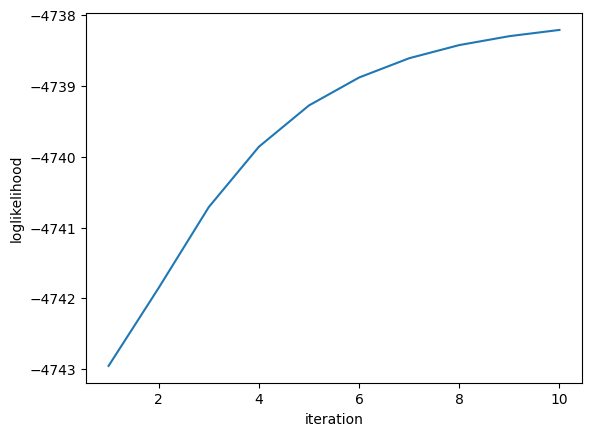

In [23]:
x, y = [], []

for _ in all_result:
    x.append(_['iteration'])
    y.append(_['loglikelihood'])
    
plt.plot(x, y)
plt.xlabel("iteration")
plt.ylabel("loglikelihood")

### alpha

Text(0, 0.5, 'alpha')

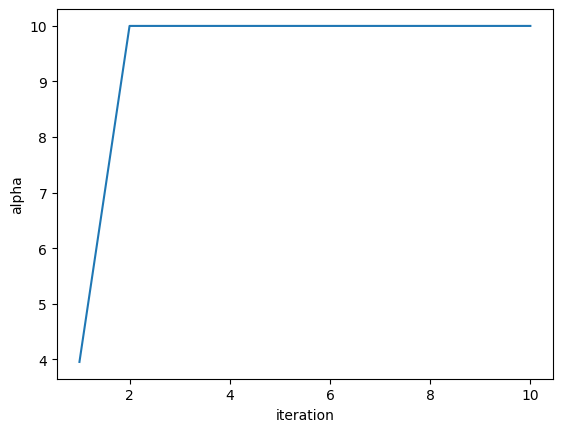

In [24]:
x, y = [], []

for _ in all_result:
    x.append(_['iteration'])
    y.append(_['alpha'])
    
plt.plot(x, y)
plt.xlabel("iteration")
plt.ylabel("alpha")

### image

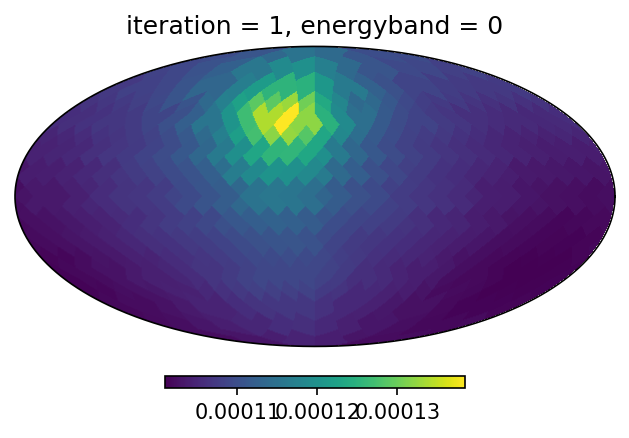

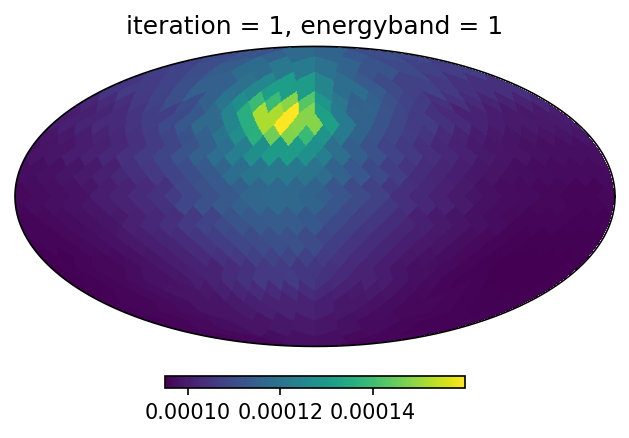

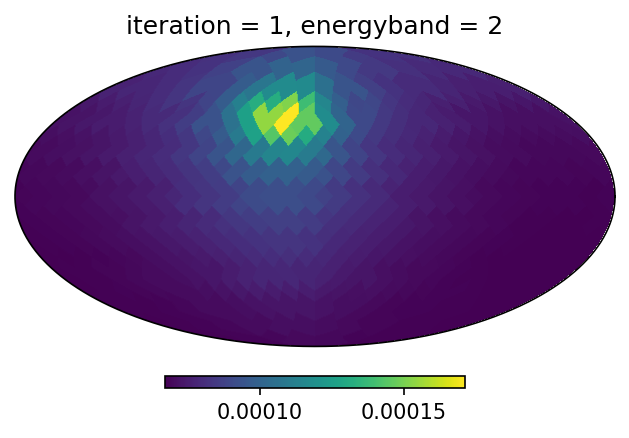

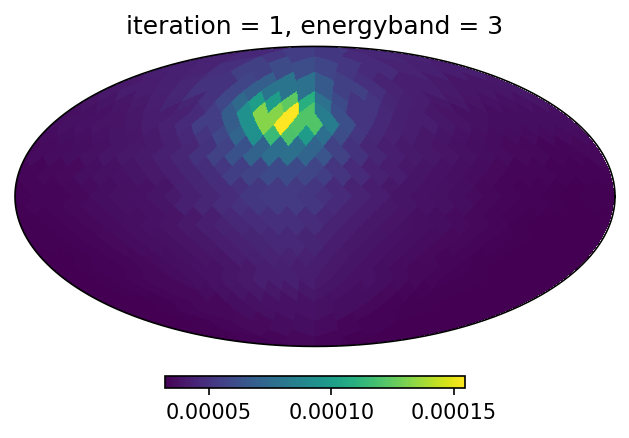

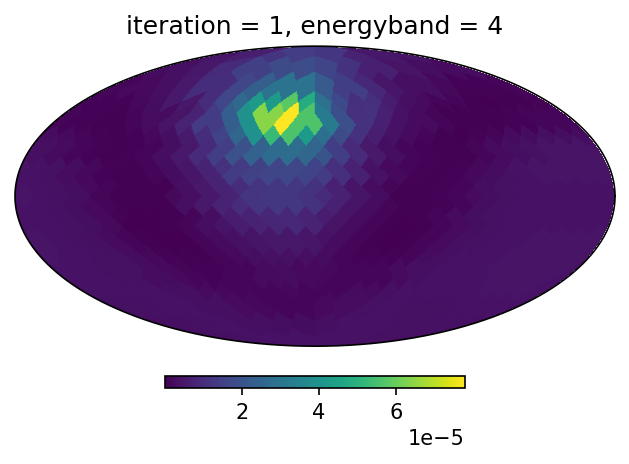

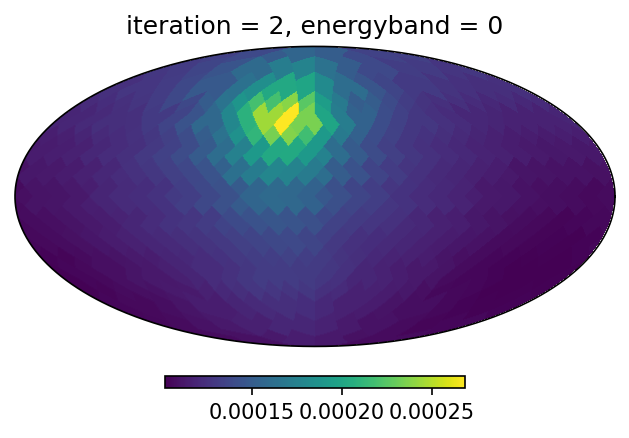

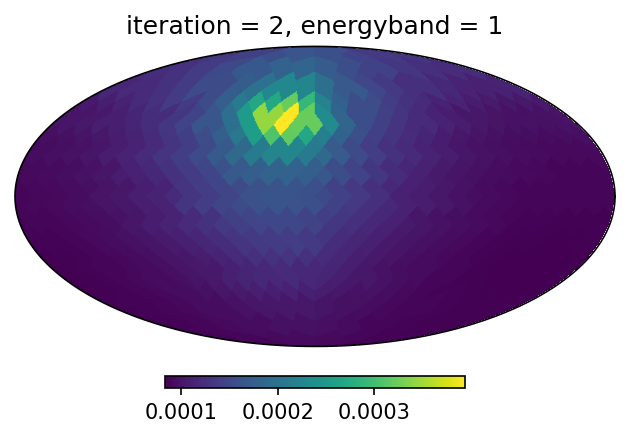

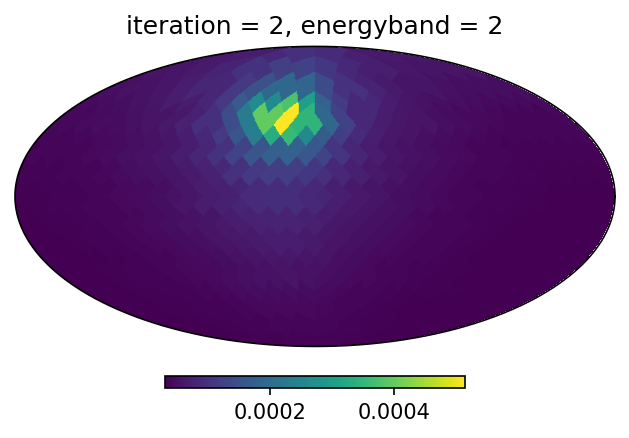

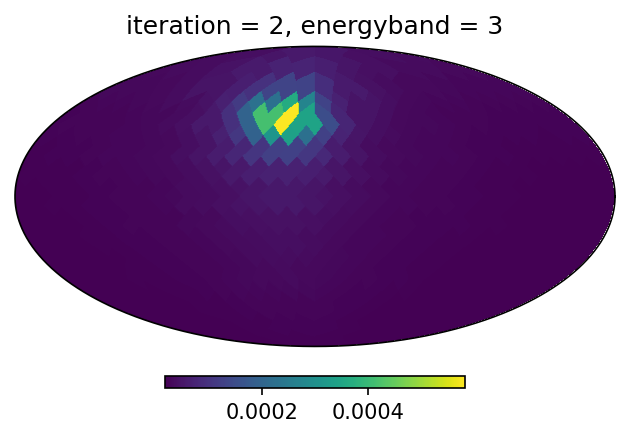

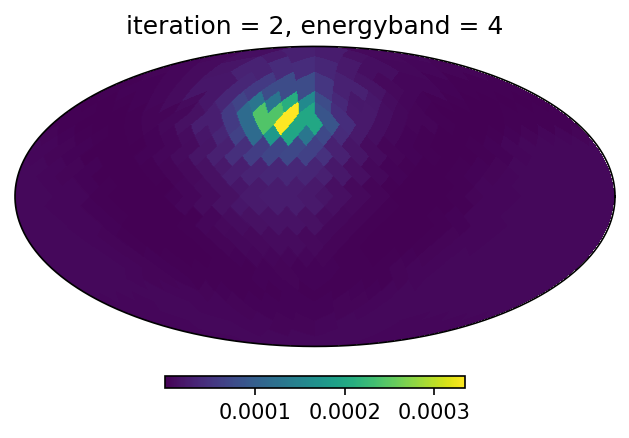

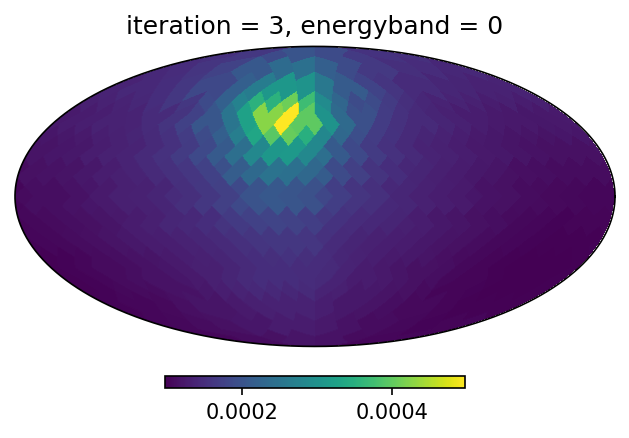

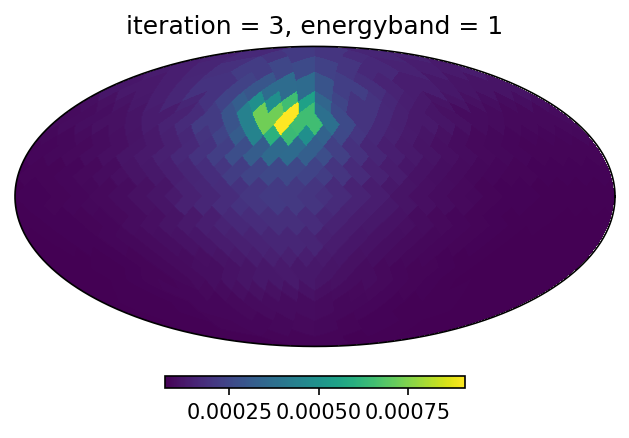

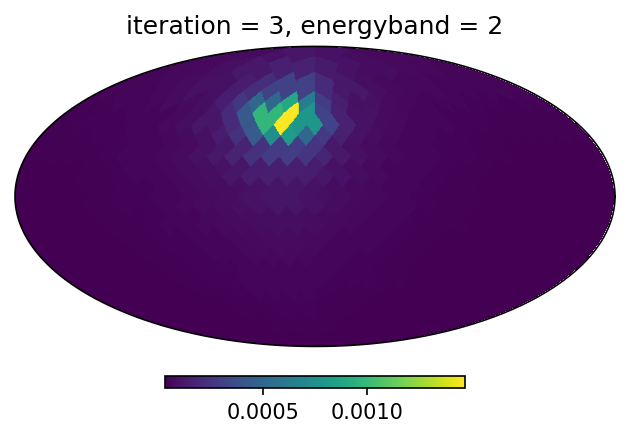

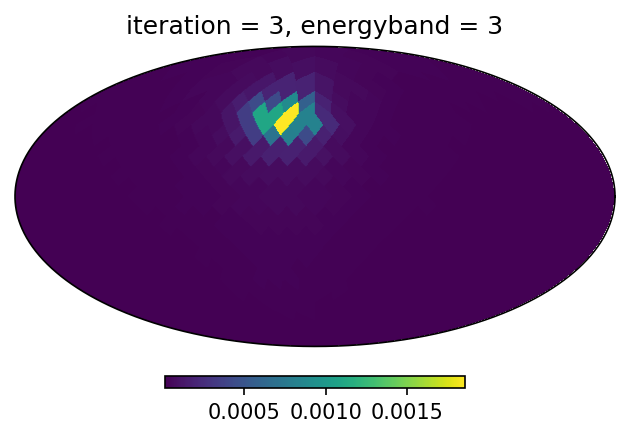

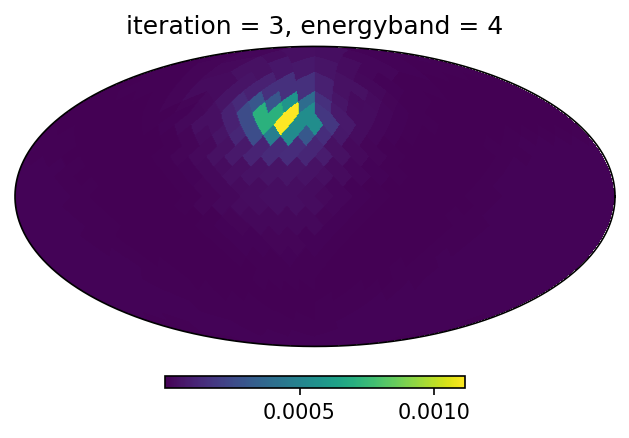

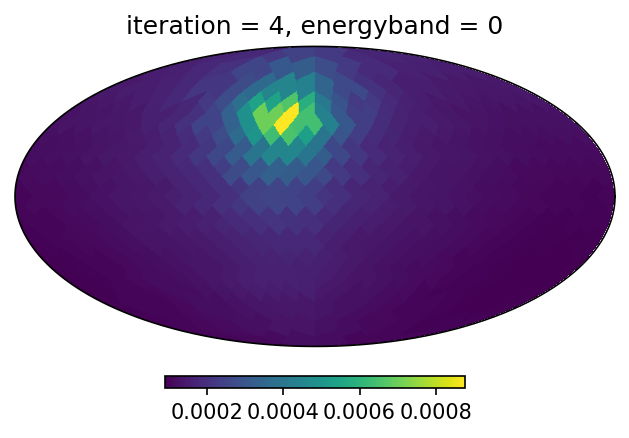

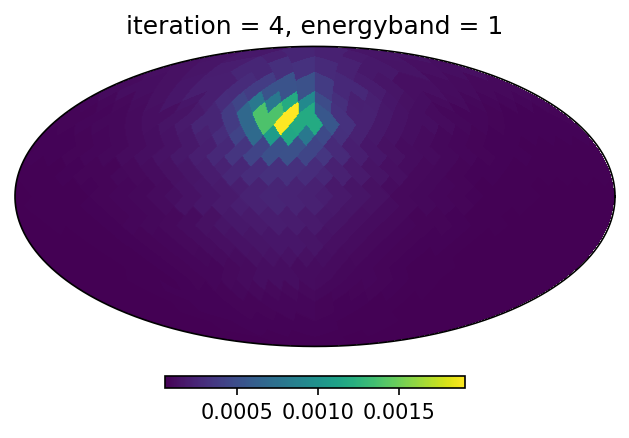

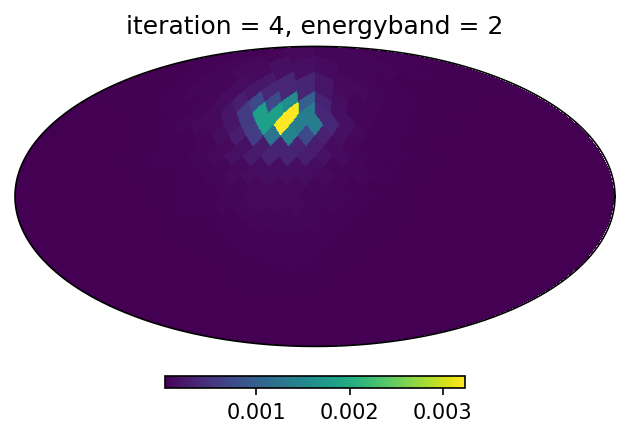

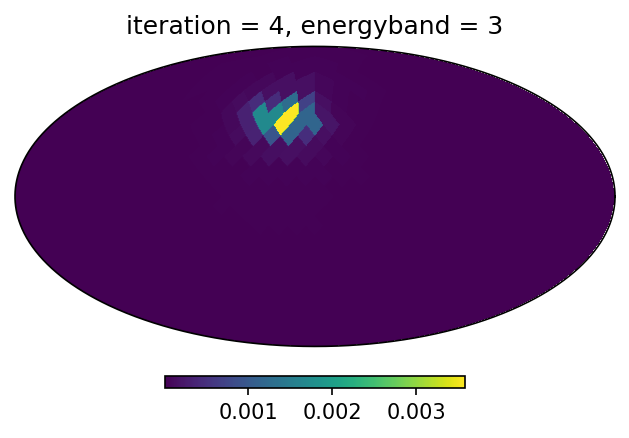

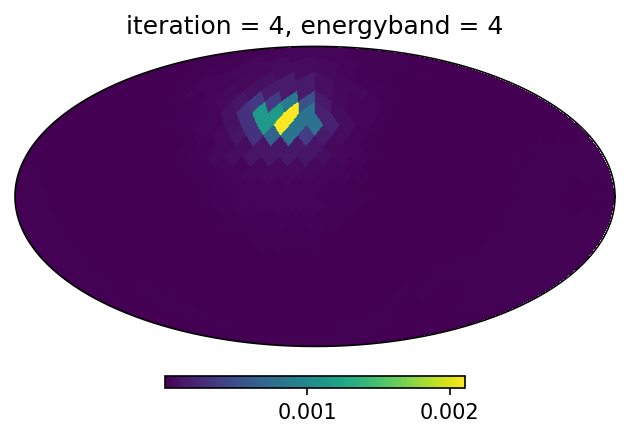

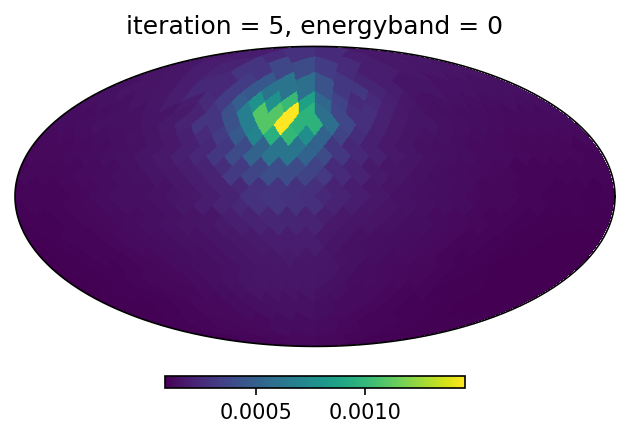

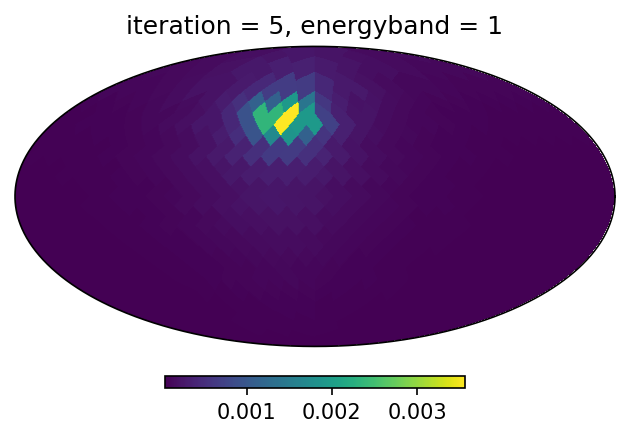

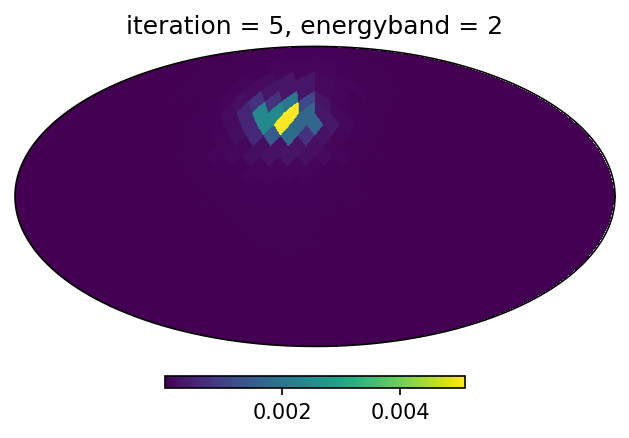

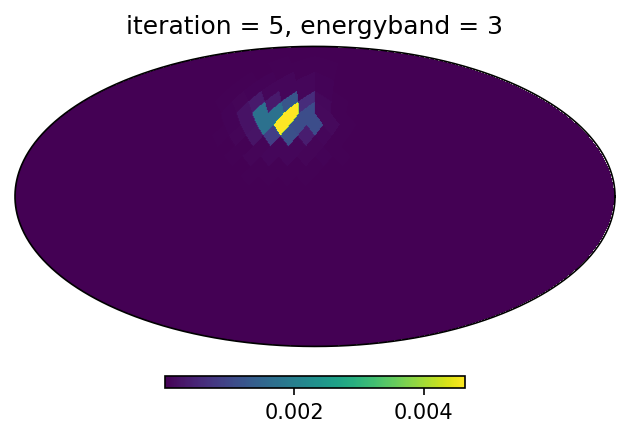

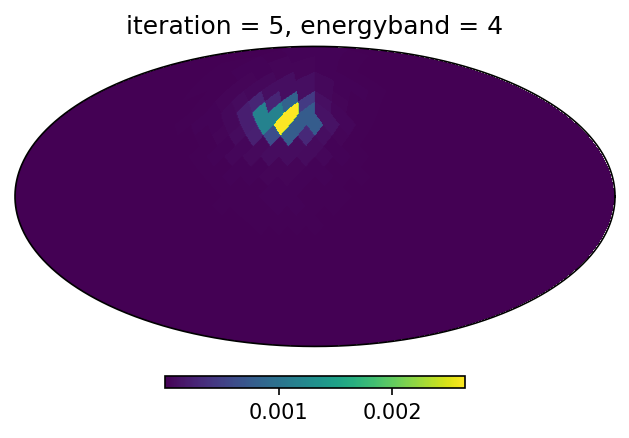

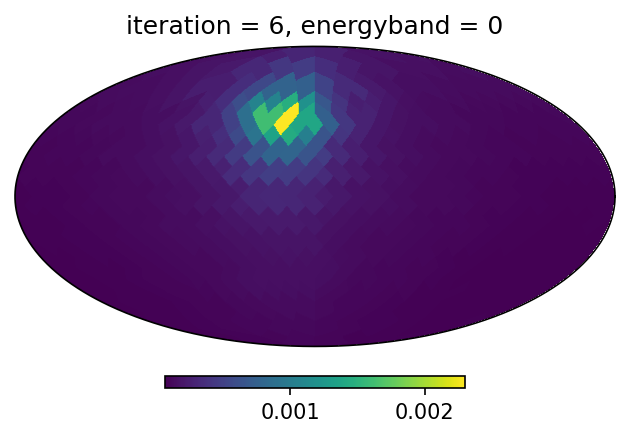

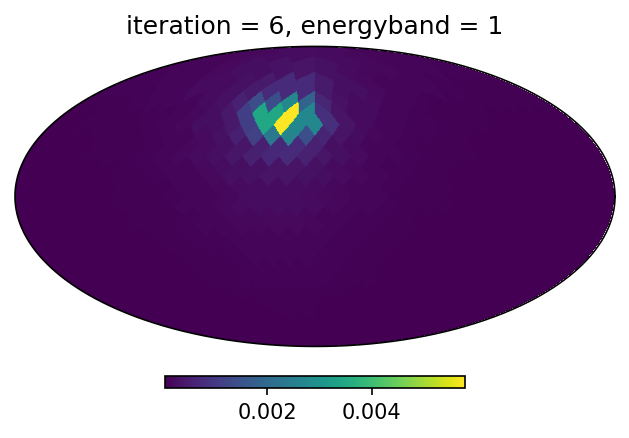

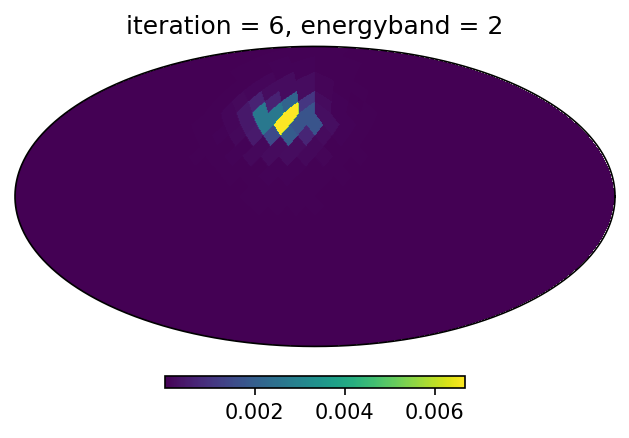

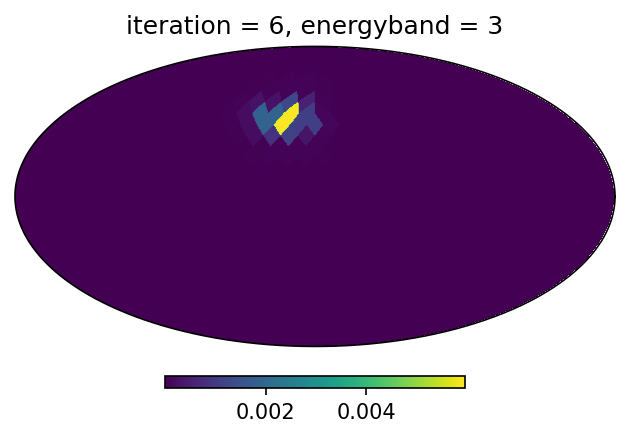

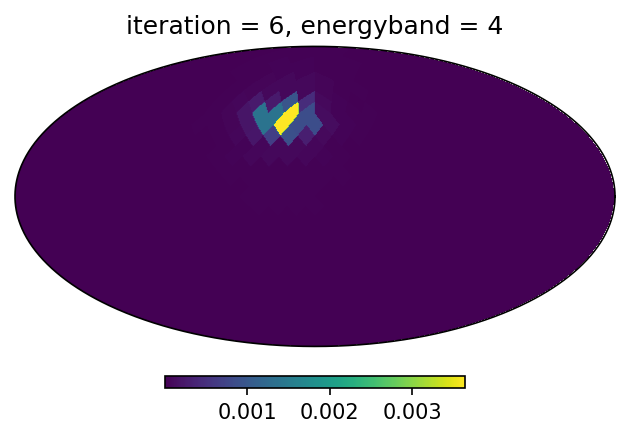

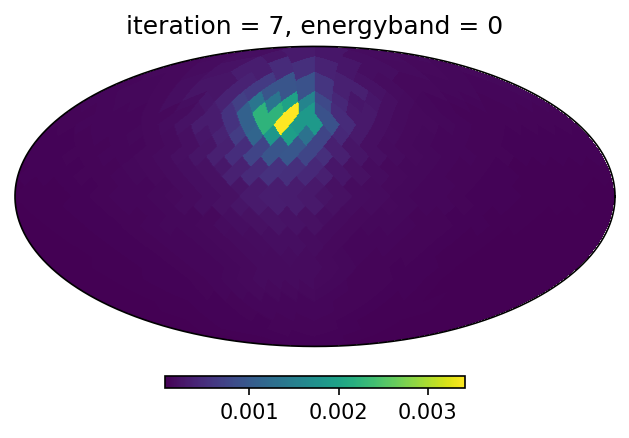

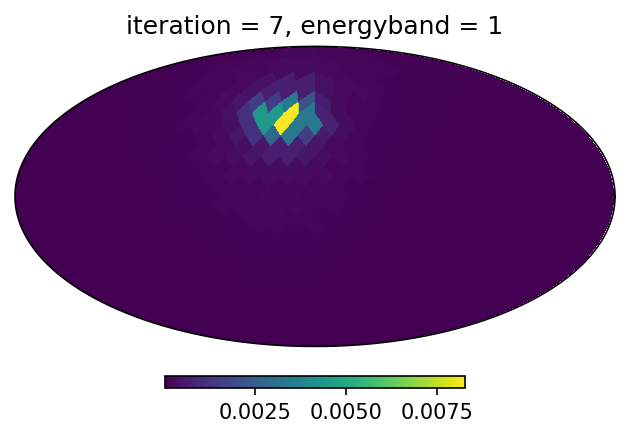

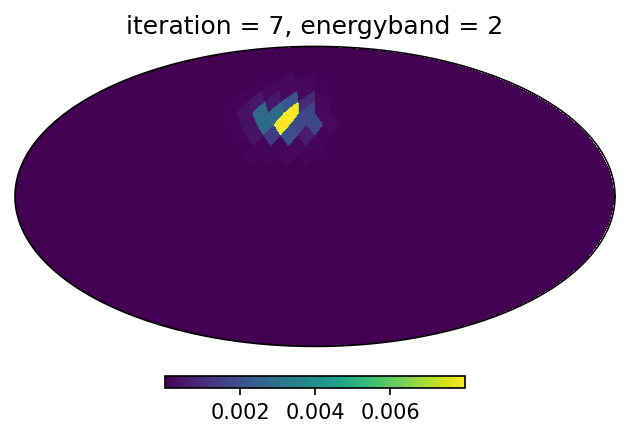

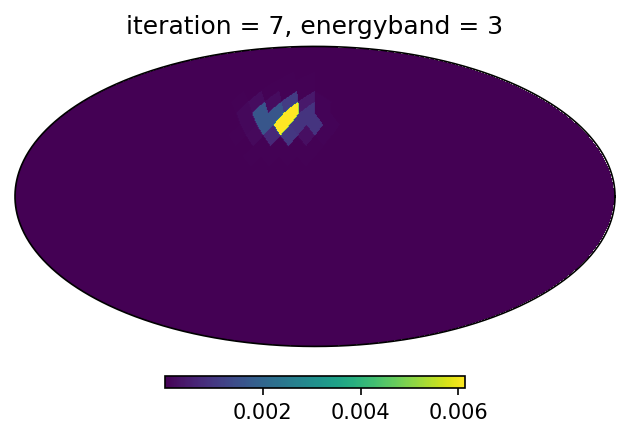

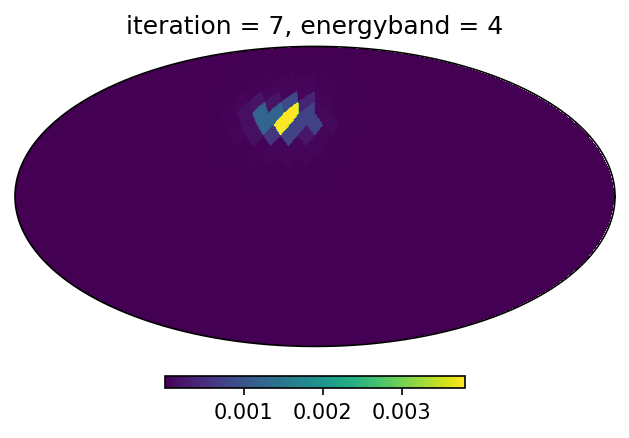

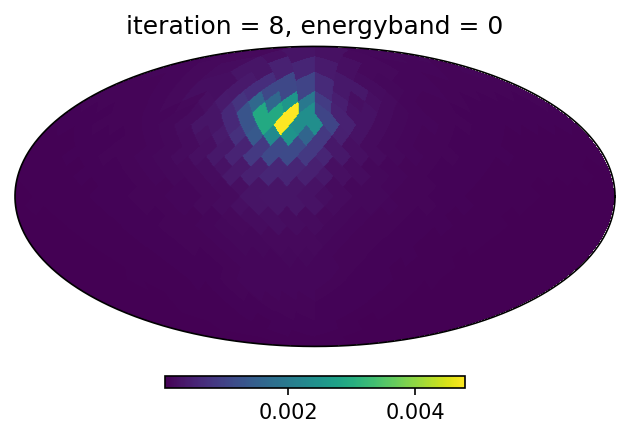

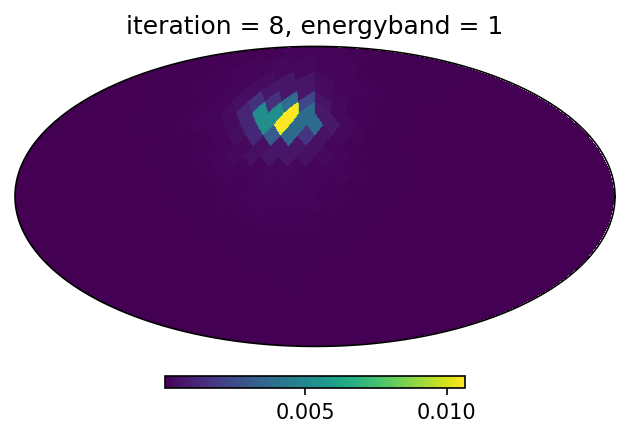

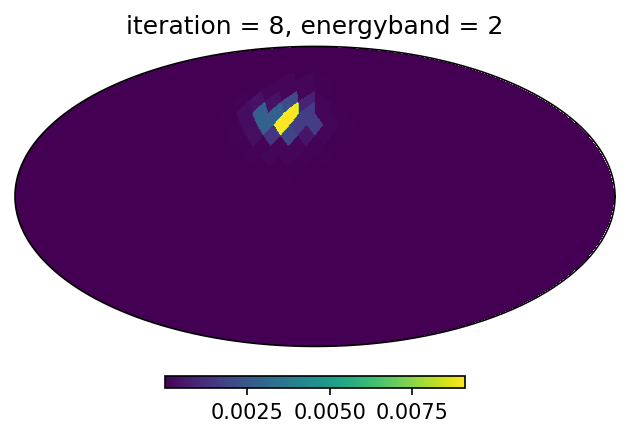

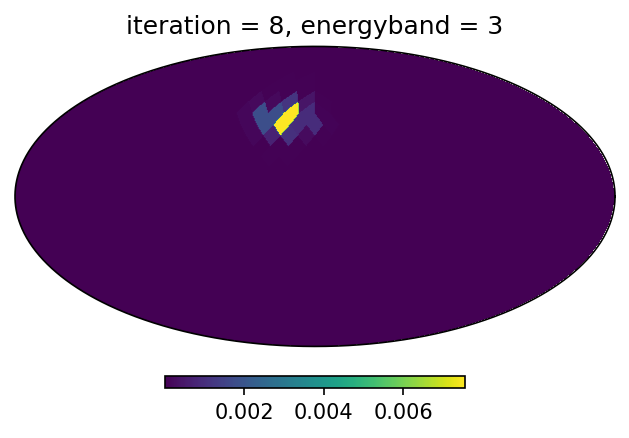

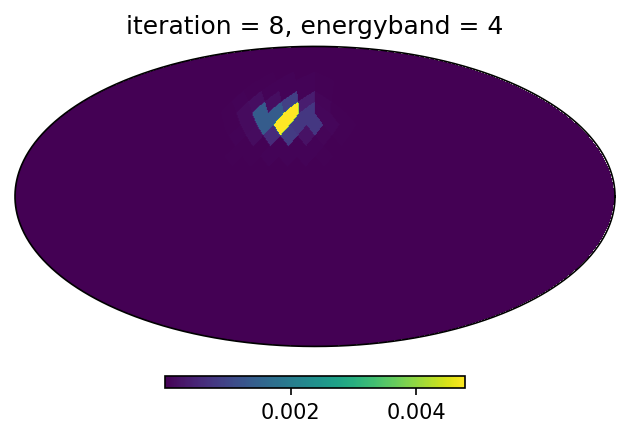

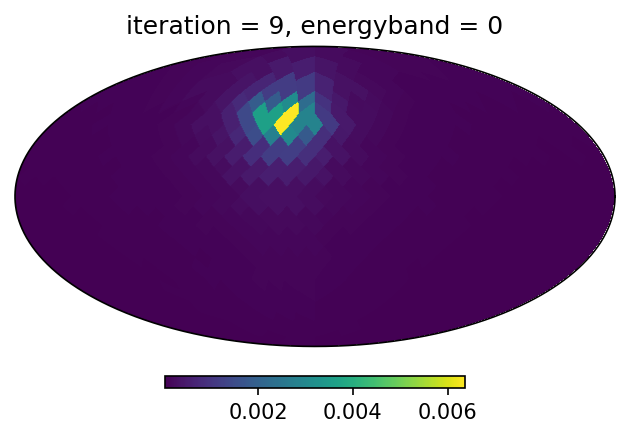

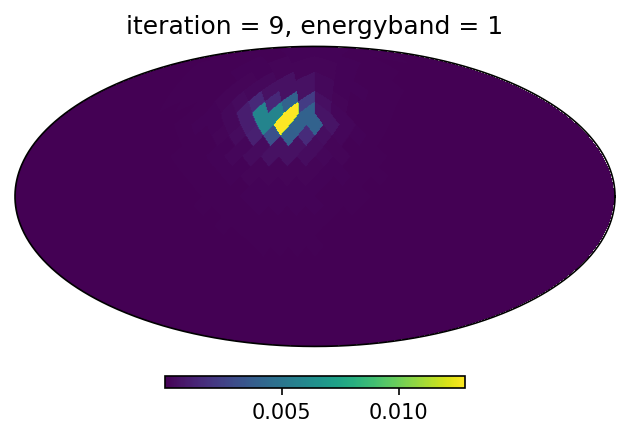

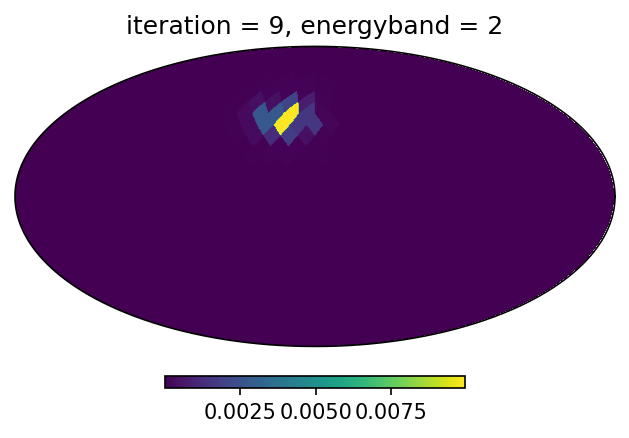

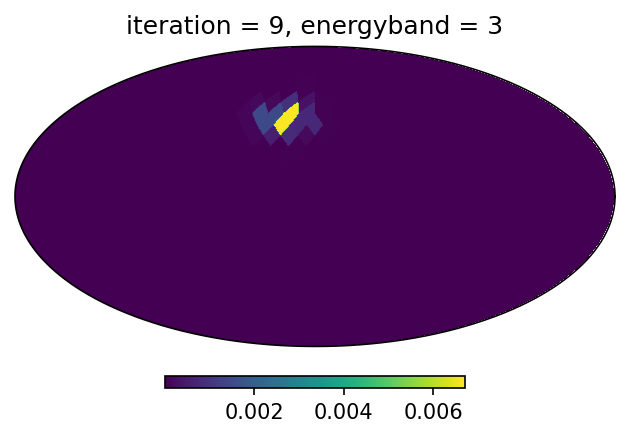

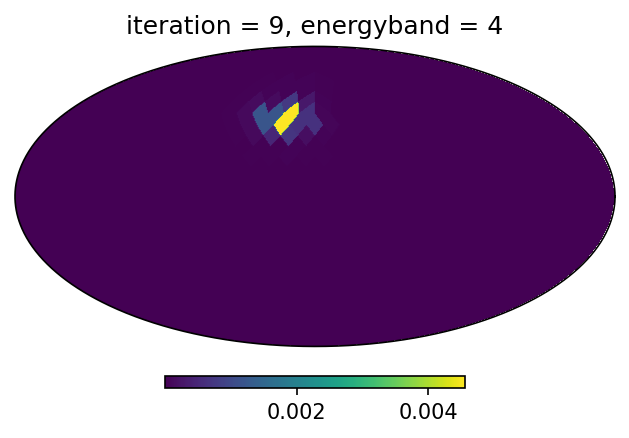

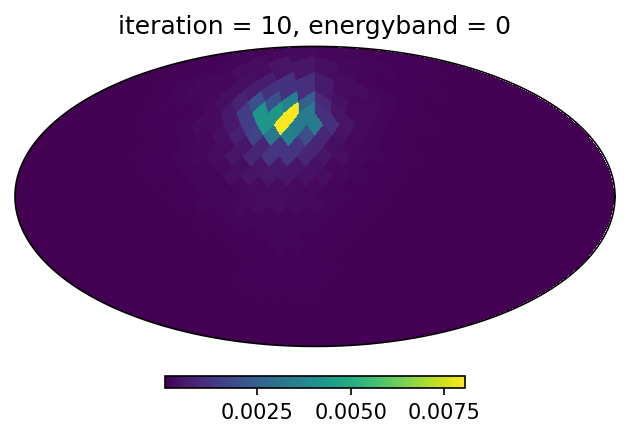

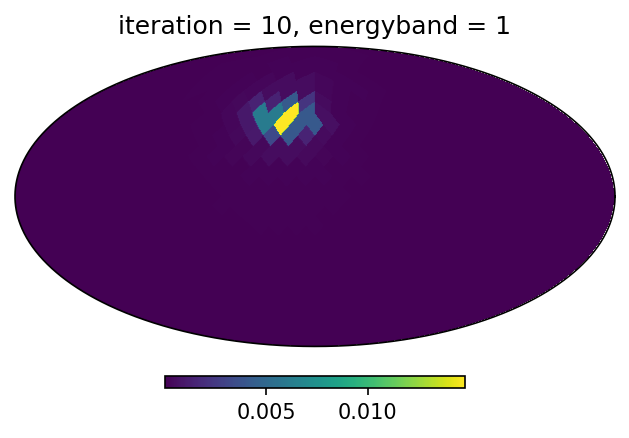

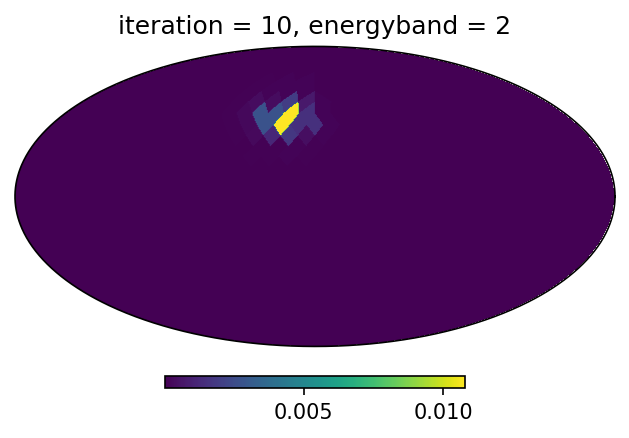

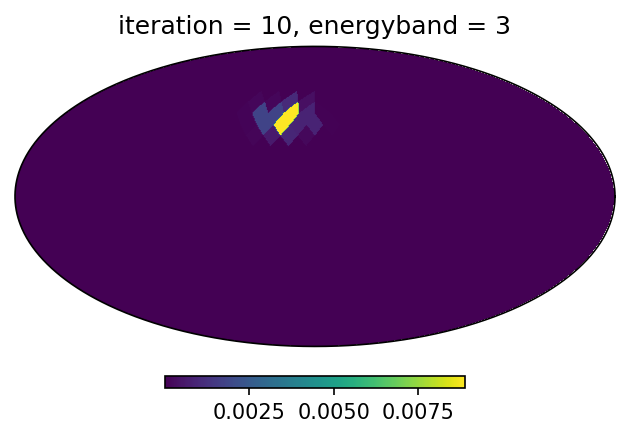

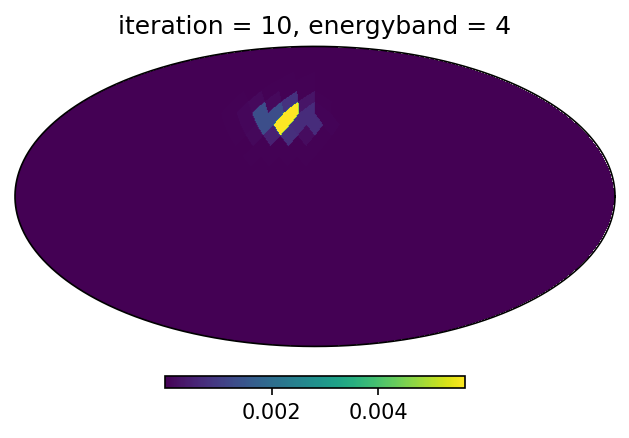

In [25]:
for _ in all_result:
    iteration = _['iteration']
    image = _['model_map']
        
    for energy_band in range(5):
        map_healpxmap = HealpixMap(data = image[:,energy_band], unit = image.unit)

        map_healpxmap.plot()
        plt.title(label = "iteration = {}, energyband = {}".format(iteration, energy_band))
        plt.show()

### delta_image

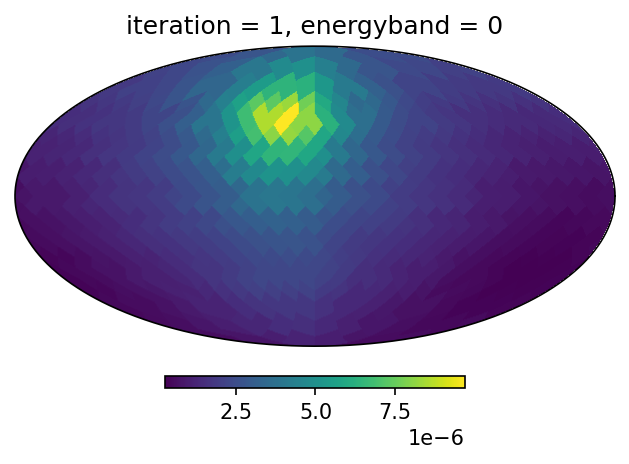

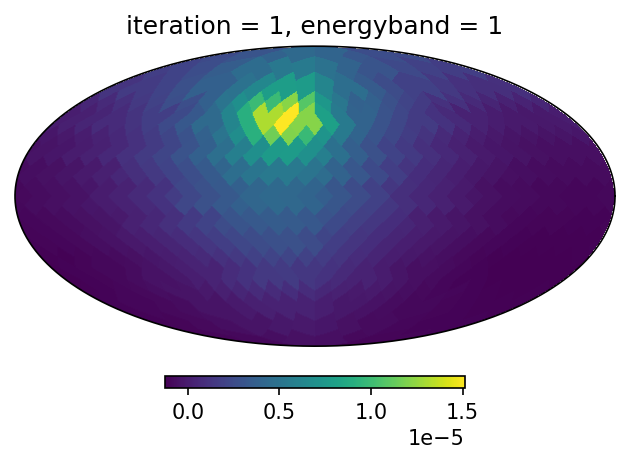

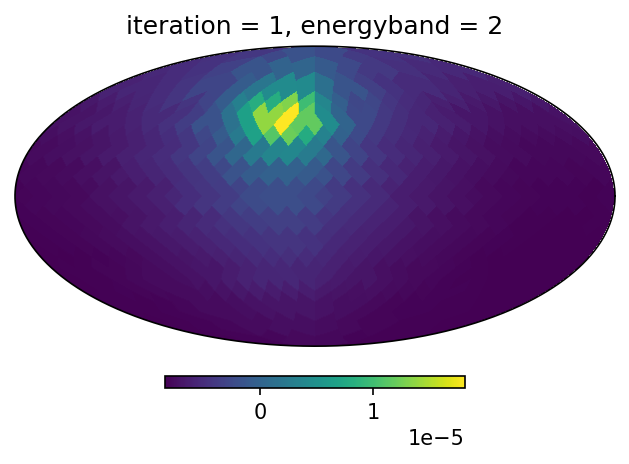

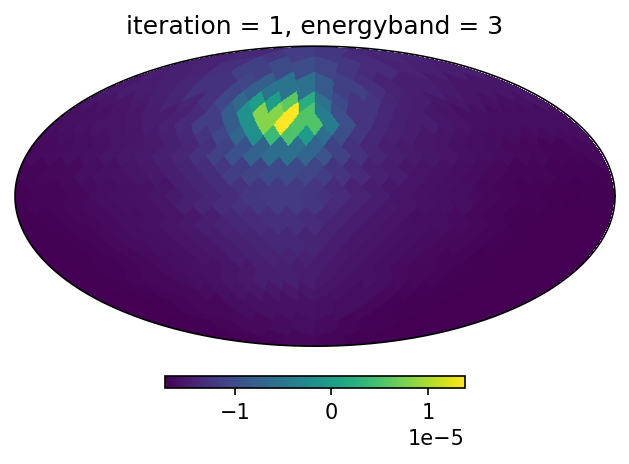

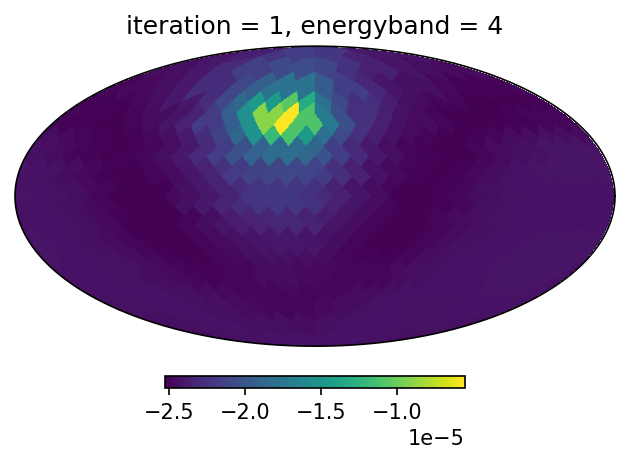

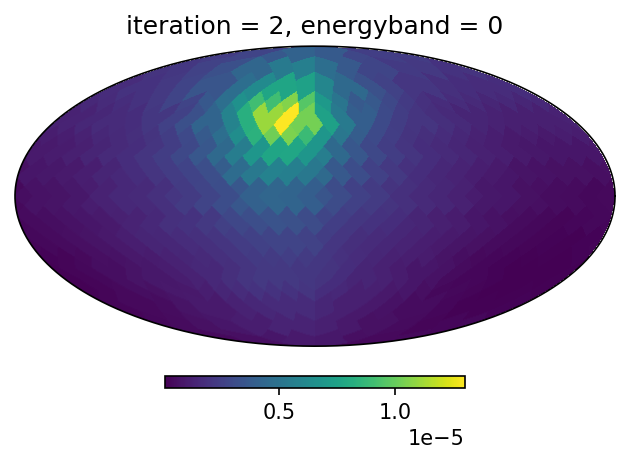

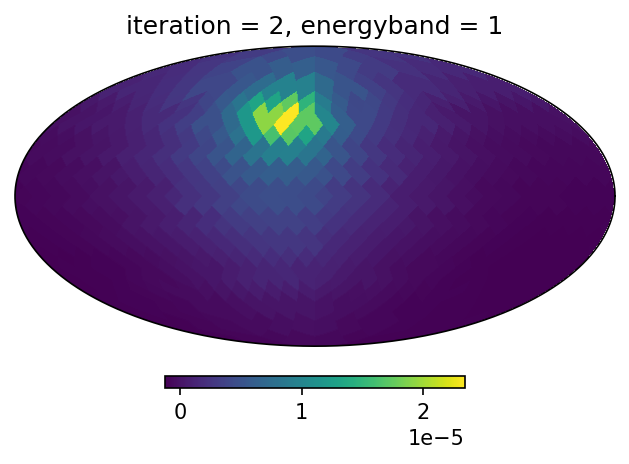

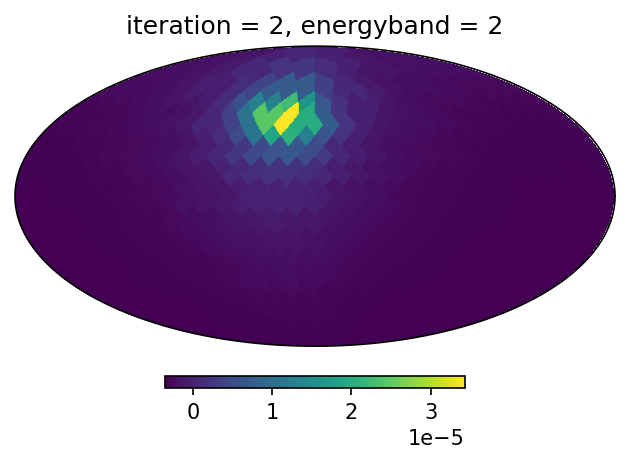

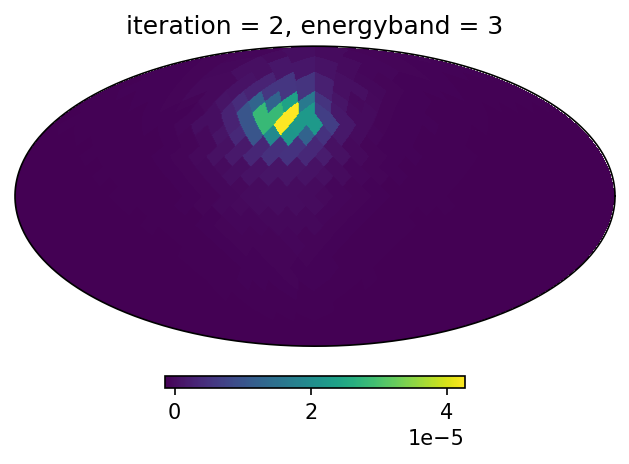

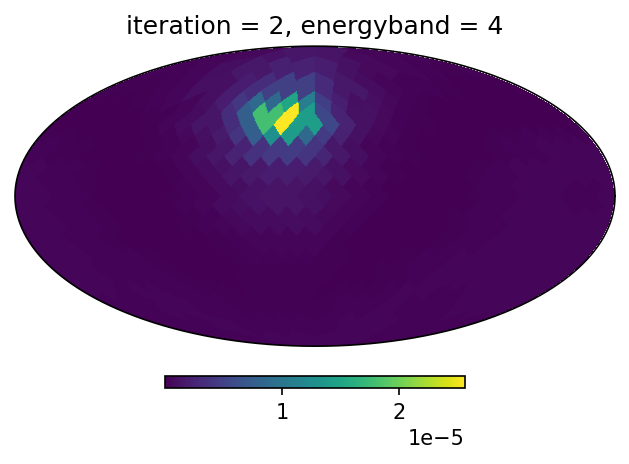

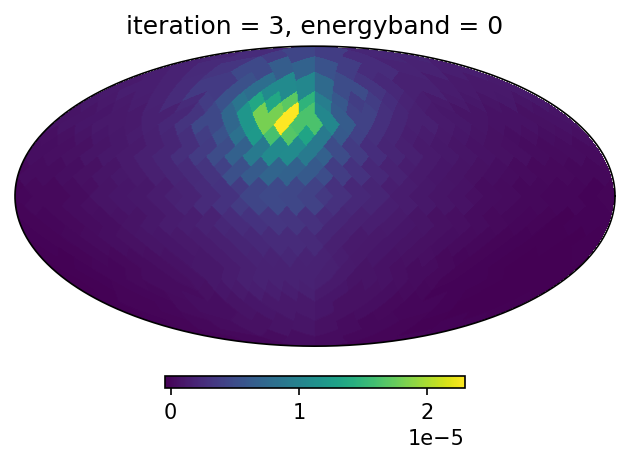

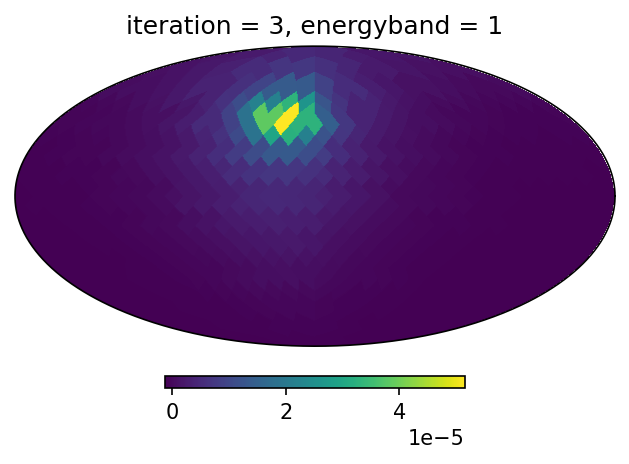

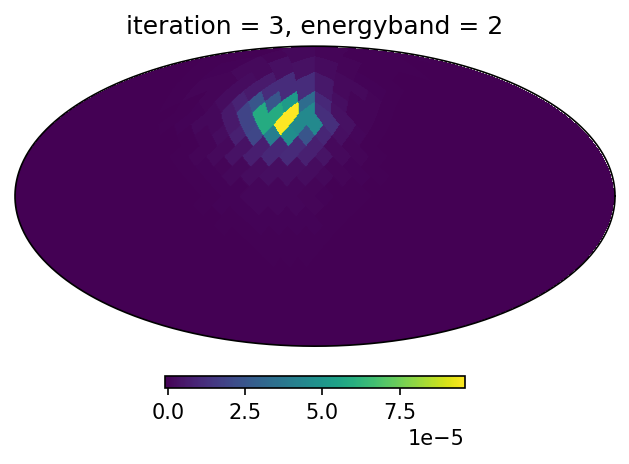

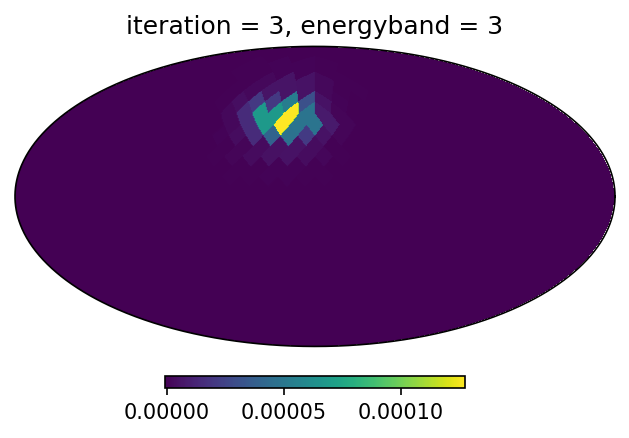

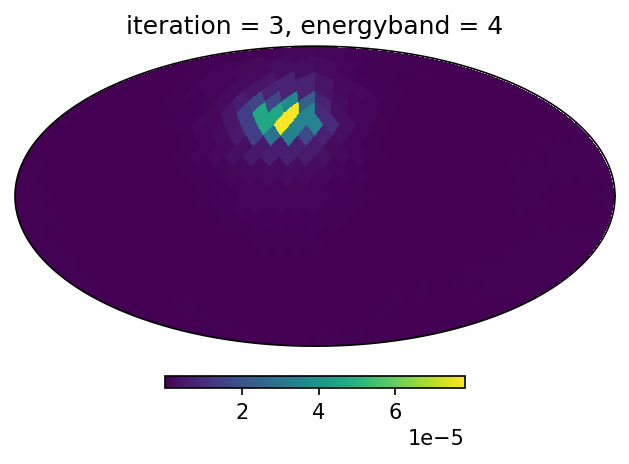

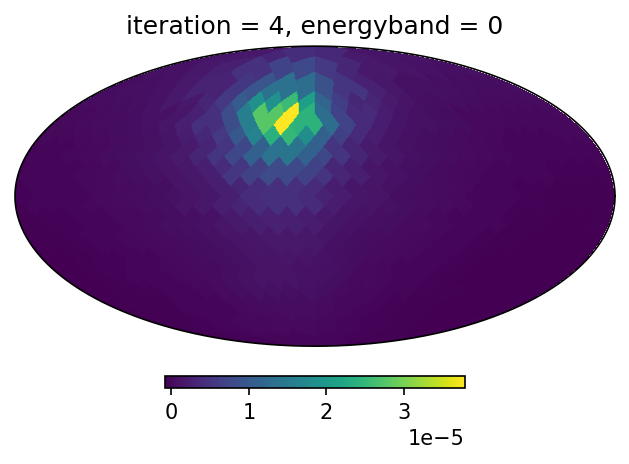

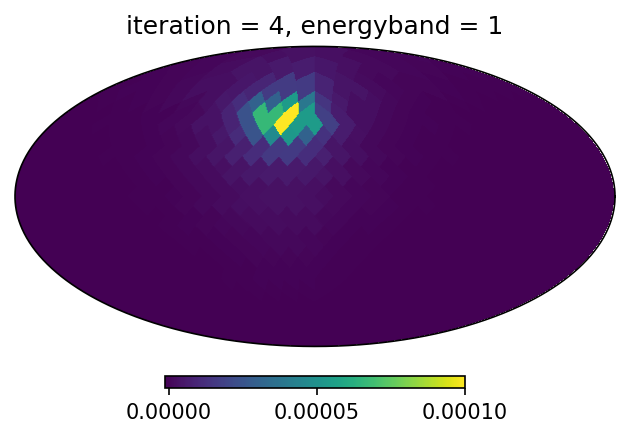

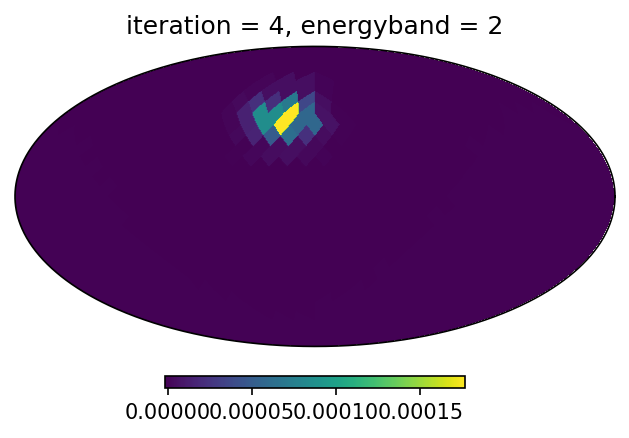

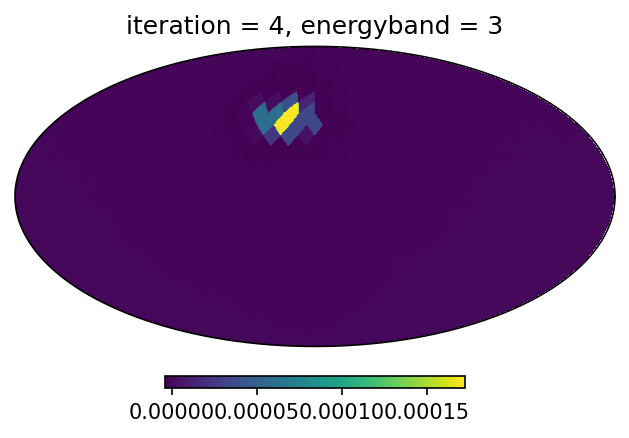

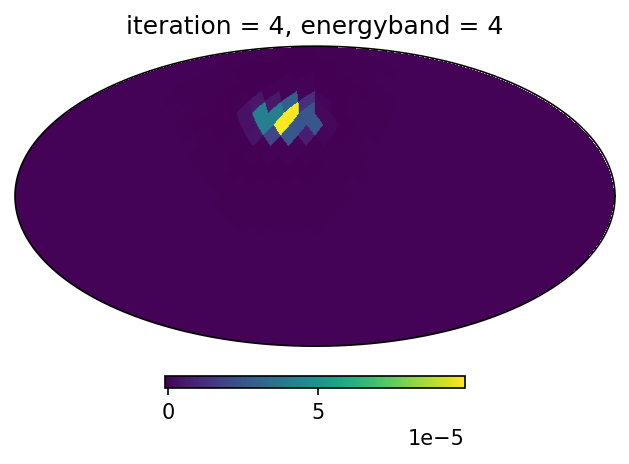

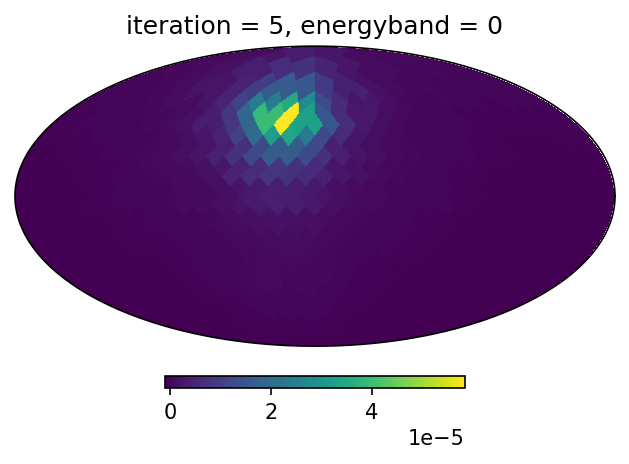

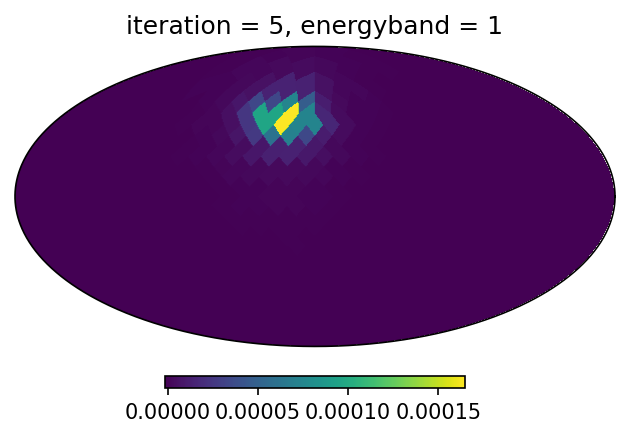

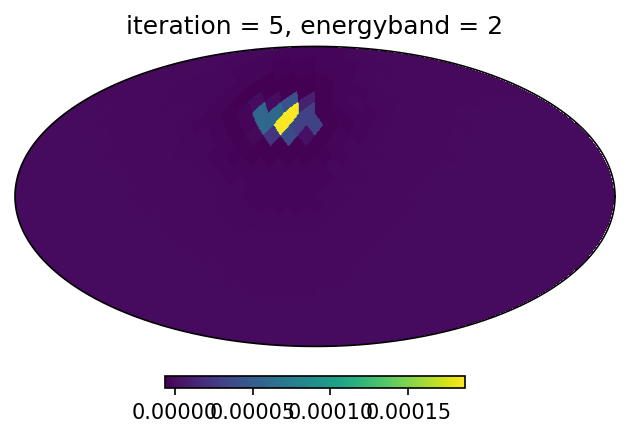

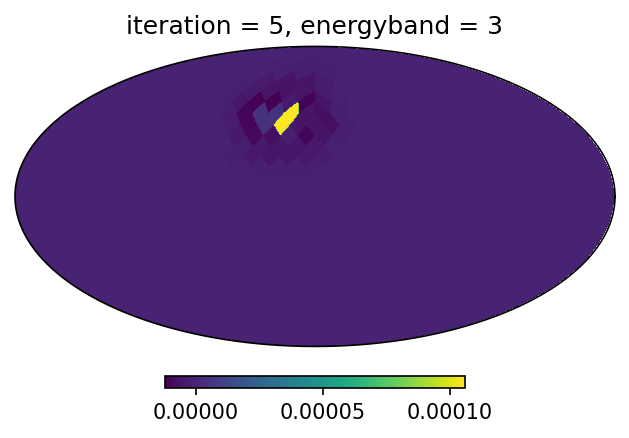

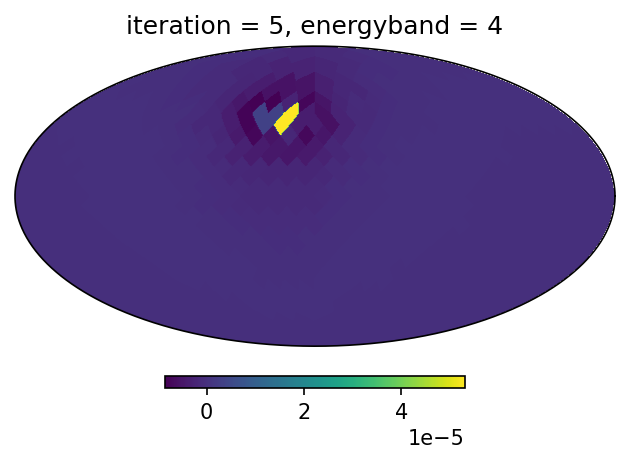

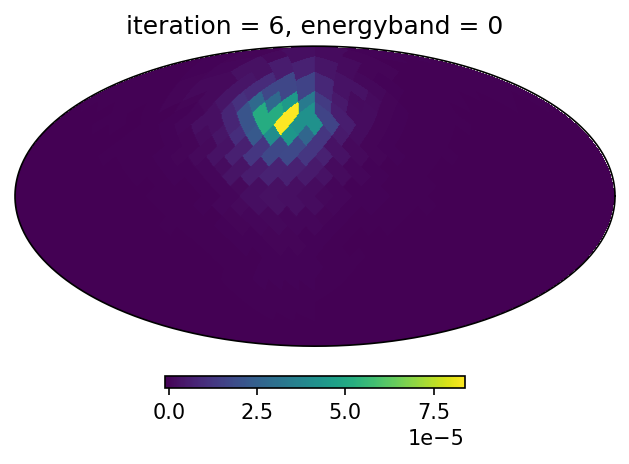

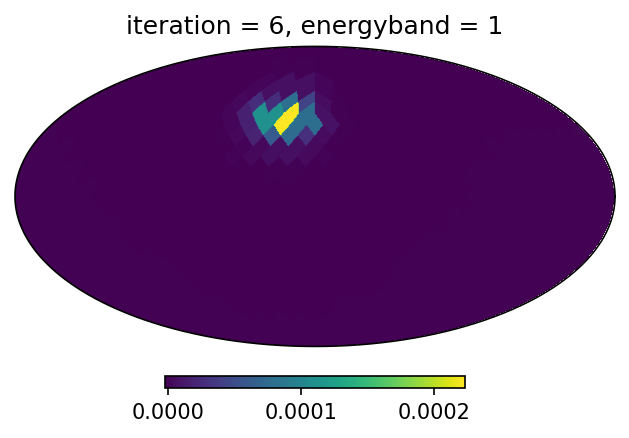

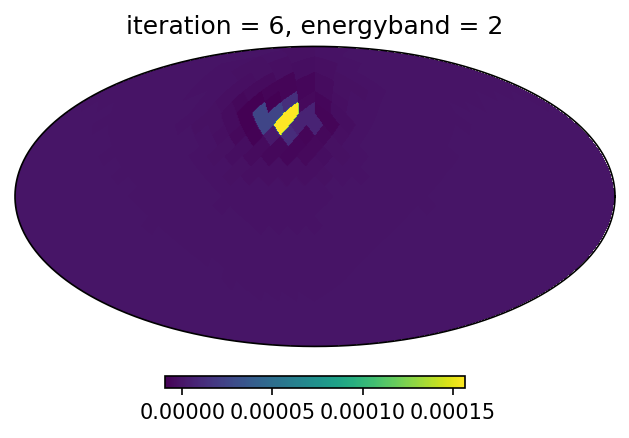

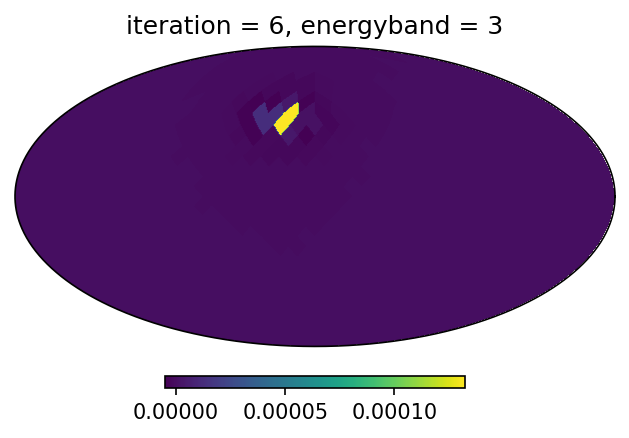

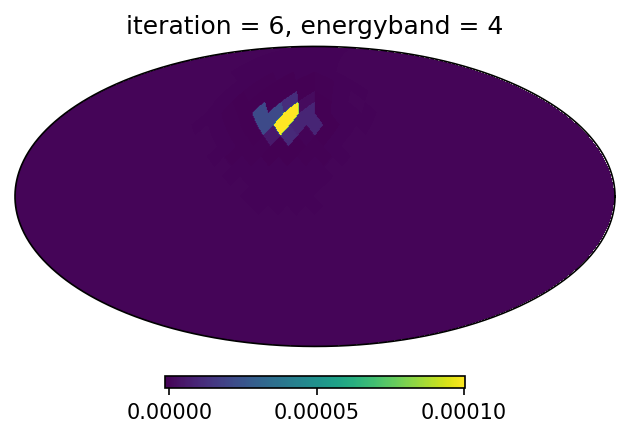

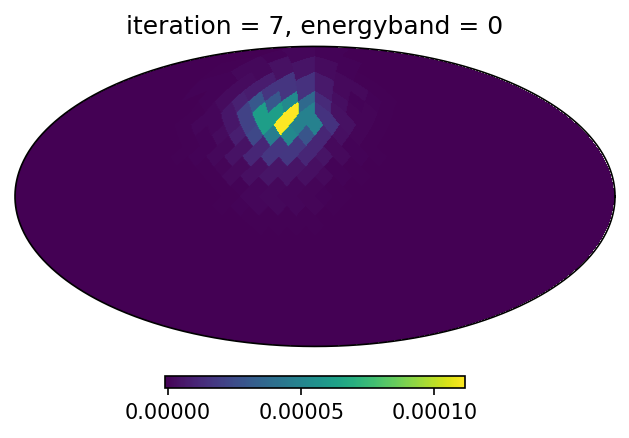

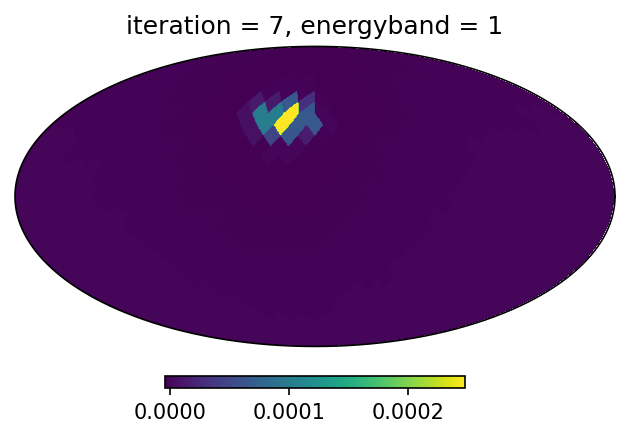

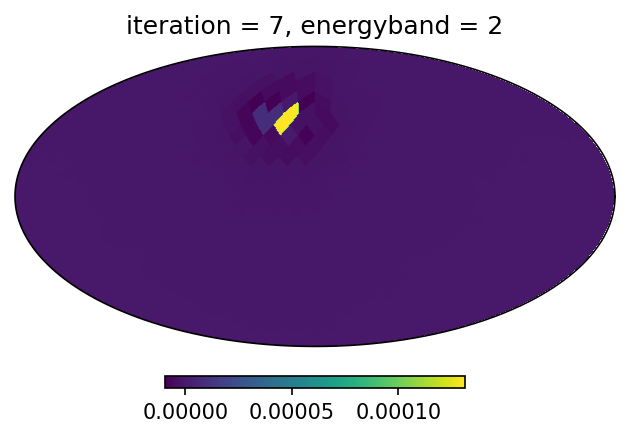

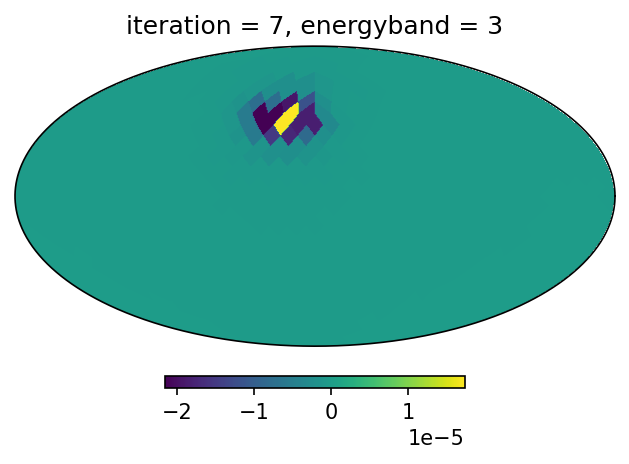

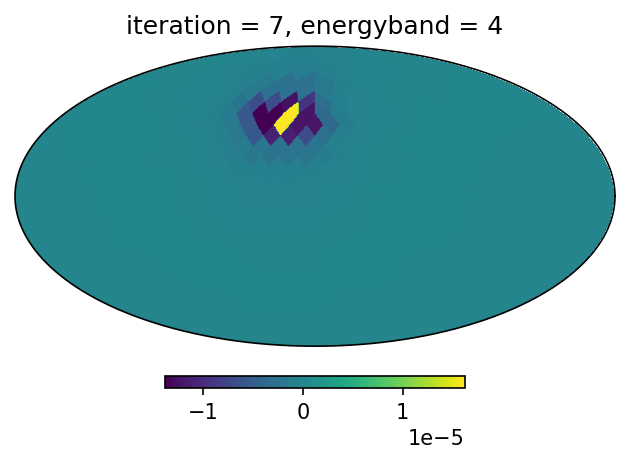

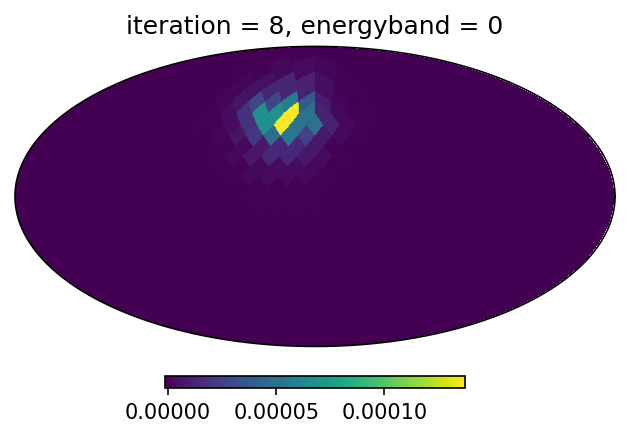

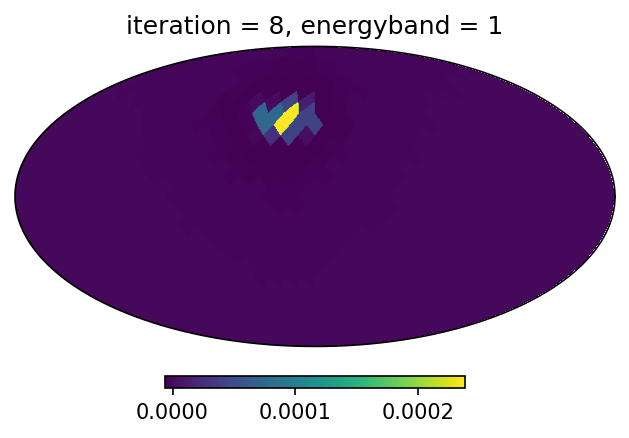

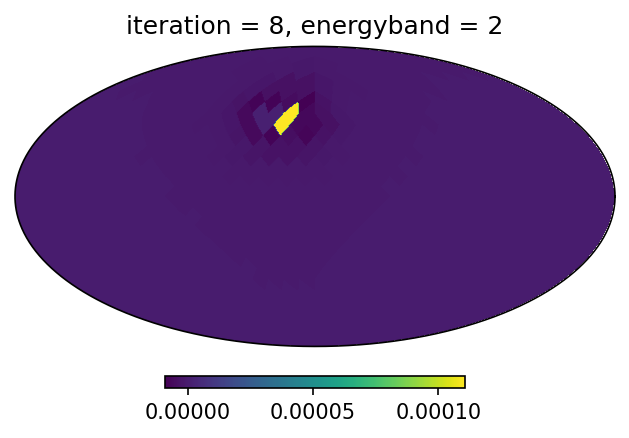

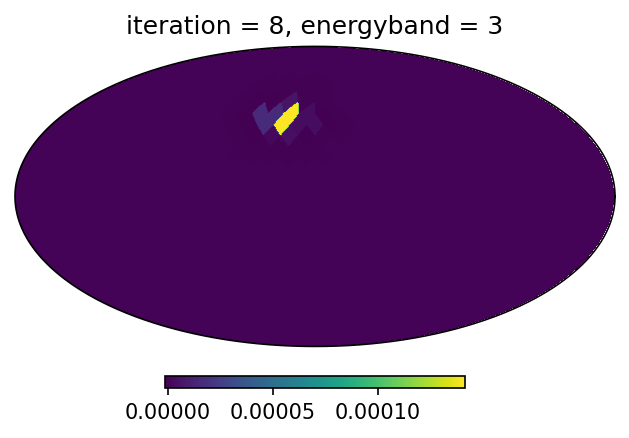

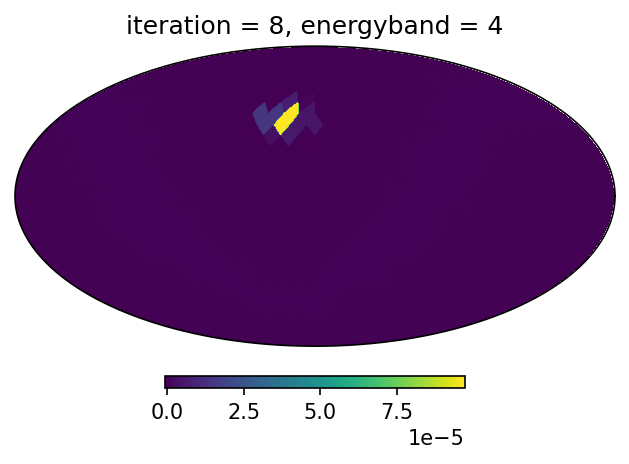

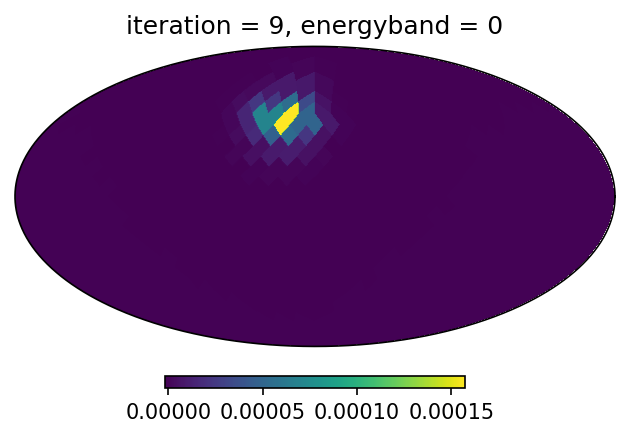

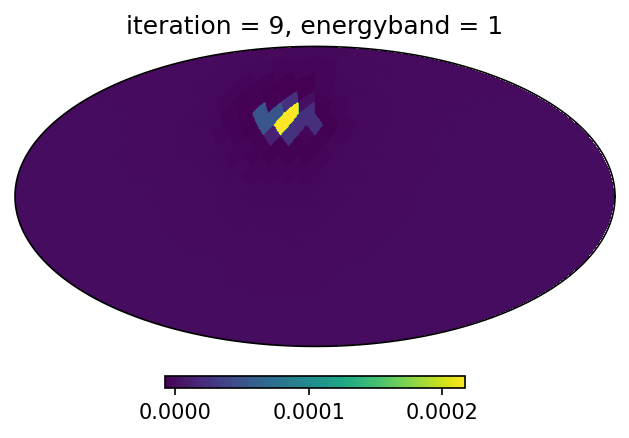

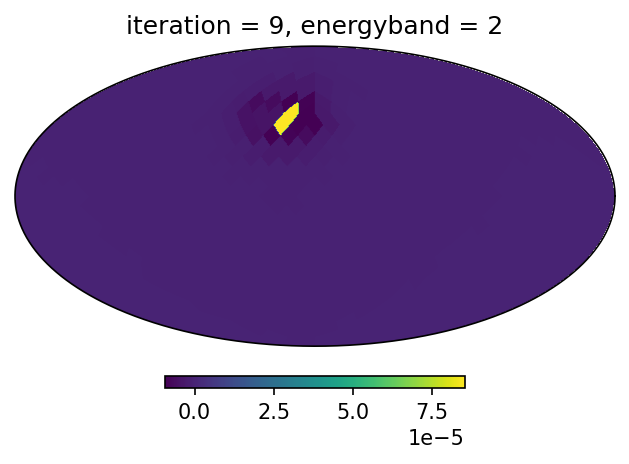

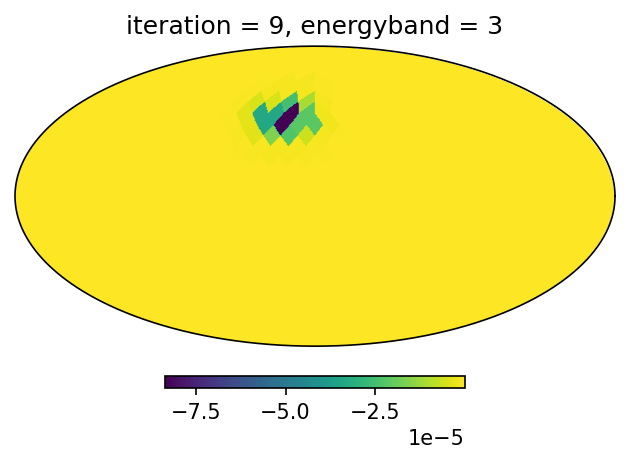

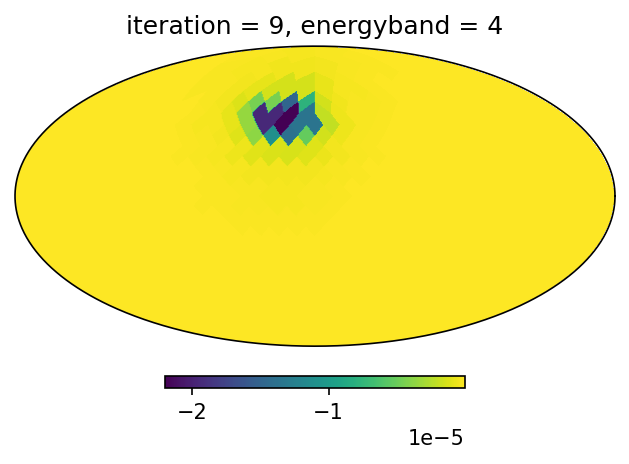

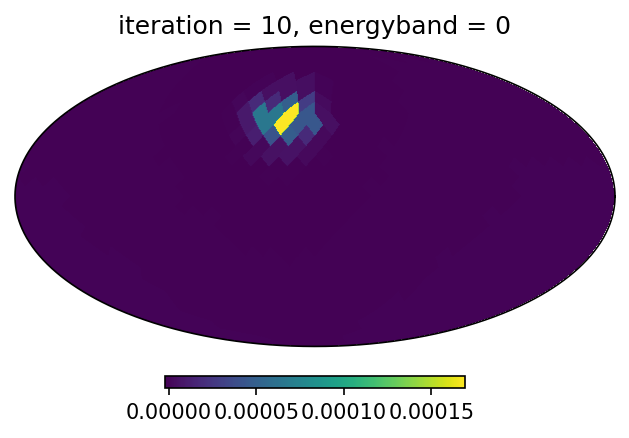

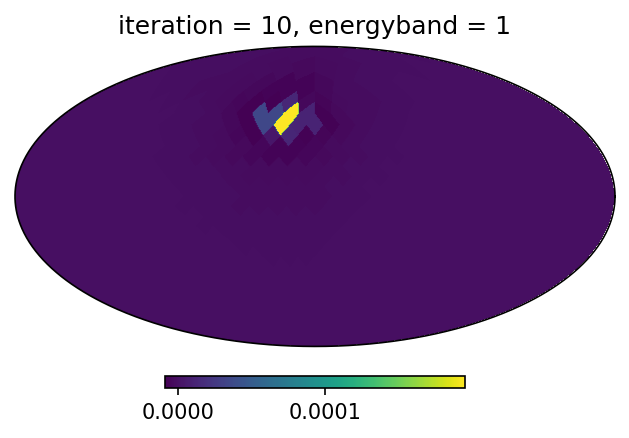

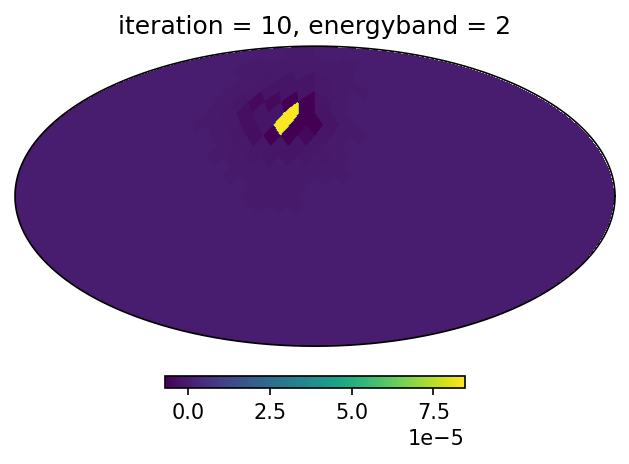

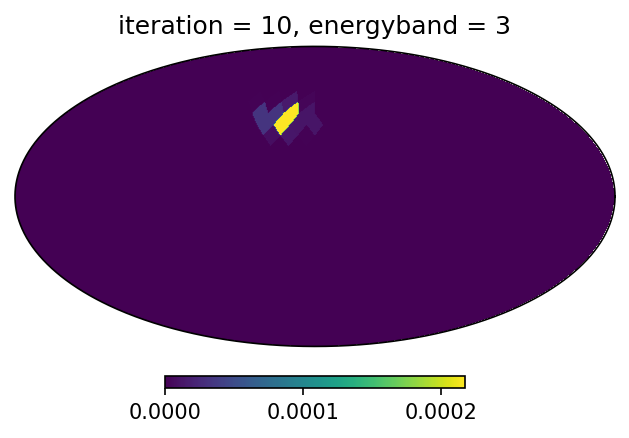

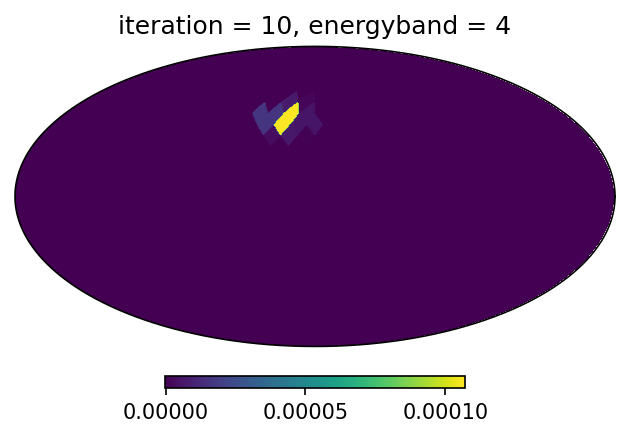

In [15]:
for _ in all_result:
    iteration = _['iteration']
    image = _['delta_map']
        
    for energy_band in range(5):
        map_healpxmap = HealpixMap(data = image[:,energy_band], unit = image.unit)

        map_healpxmap.plot()
        plt.title(label = "iteration = {}, energyband = {}".format(iteration, energy_band))
        plt.show()

### flux

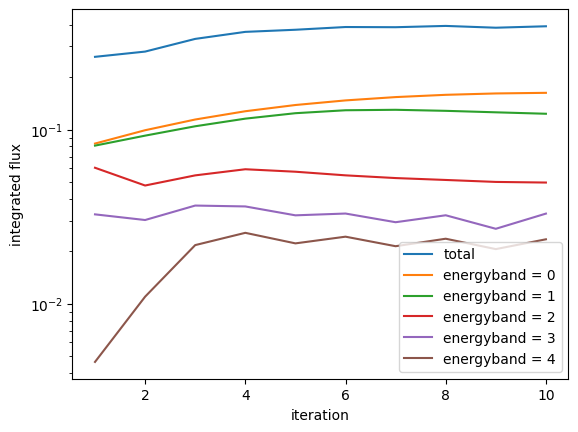

In [26]:
iteration = []
integrated_flux = []
integrated_flux_each_band = [[],[],[],[],[]]

for _ in all_result:
    iteration.append(_['iteration'])
    image = _['model_map']

    integrated_flux.append( np.sum(image) / image.unit)

    for energy_band in range(5):
        integrated_flux_each_band[energy_band].append( np.sum(image[:,energy_band]) / image.unit)
        
plt.plot(iteration, integrated_flux, label = 'total')
plt.xlabel("iteration")
plt.ylabel("integrated flux")
plt.yscale("log")

for energy_band in range(5):
    plt.plot(iteration, integrated_flux_each_band[energy_band], label = "energyband = {}".format(energy_band))
    
plt.legend()

### flux delta

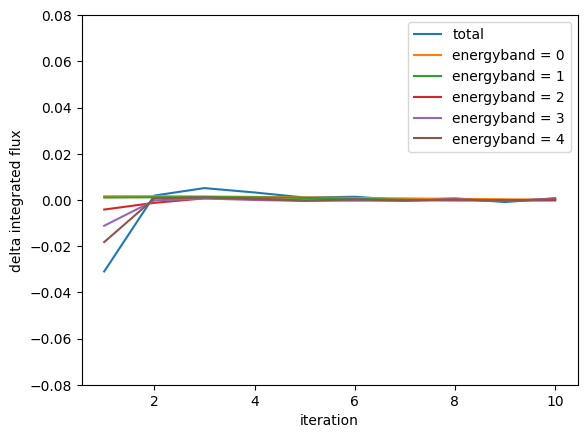

In [27]:
iteration = []
delta_integrated_flux = []
delta_integrated_flux_each_band = [[],[],[],[],[]]

for _ in all_result:
    iteration.append(_['iteration'])
    delta_image = _['delta_map']

    delta_integrated_flux.append( np.sum(delta_image) / delta_image.unit)

    for energy_band in range(5):
        delta_integrated_flux_each_band[energy_band].append( np.sum(delta_image[:,energy_band]) / delta_image.unit)
        
plt.plot(iteration, delta_integrated_flux, label = 'total')
plt.xlabel("iteration")
plt.ylabel("delta integrated flux")
plt.ylim(-0.08, 0.08)

for energy_band in range(5):
    plt.plot(iteration, delta_integrated_flux_each_band[energy_band], label = "energyband = {}".format(energy_band))
    
plt.legend()

## comparision with the truth value

In [28]:
from gammapy.modeling.models import PowerLawSpectralModel

spectrum = PowerLawSpectralModel(index = 1.7,
                                 amplitude = 1e-1 / u.cm / u.cm / u.s / u.keV,
                                 reference = 1 * u.keV)

integrated_flux_truth = spectrum.integral(100 * u.keV, 5000.0 * u.keV)
pixel_area = 4 * 3.1415 * u.sr / all_result[0]['model_map'].axes['NuLambda'].npix

print("truth:", integrated_flux_truth)

print("deconvolution:", integrated_flux[-1] * pixel_area * u.cm**-2 * u.s**-1 * u.sr**-1)

/Users/thomassiegert/.virtualenvs/cosipy/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


truth: 0.0053194357811798985 1 / (cm2 s)
deconvolution: 0.006409219325826674 1 / (cm2 s)


In [29]:
integrated_flux_each_band_truth = []

for energy_band in range(5):
    emin, emax = dataloader.response.axes["Ei"].bounds[energy_band]

    integrated_flux_each_band_truth.append(spectrum.integral(emin, emax))
    pixel_area = 4 * 3.1415 * u.sr / all_result[0]['model_map'].axes['NuLambda'].npix
    
    print(emin, emax)
    print("    truth:", integrated_flux_each_band_truth[energy_band])
    print("    deconvolution:", integrated_flux_each_band[energy_band][-1] * pixel_area * u.cm**-2 * u.s**-1 * u.sr**-1)

100.0 keV 200.0 keV
    truth: 0.0021863351583393193 1 / (cm2 s)
    deconvolution: 0.0026588712375353687 1 / (cm2 s)
200.0 keV 500.0 keV
    truth: 0.0016574958148585972 1 / (cm2 s)
    deconvolution: 0.002016192324259639 1 / (cm2 s)
500.0 keV 1000.0 keV
    truth: 0.0007086596993887867 1 / (cm2 s)
    deconvolution: 0.0008120400868175719 1 / (cm2 s)
1000.0 keV 2000.0 keV
    truth: 0.00043623121493259617 1 / (cm2 s)
    deconvolution: 0.0005385969042515324 1 / (cm2 s)
2000.0 keV 5000.0 keV
    truth: 0.00033071389366059946 1 / (cm2 s)
    deconvolution: 0.00038351877296256153 1 / (cm2 s)


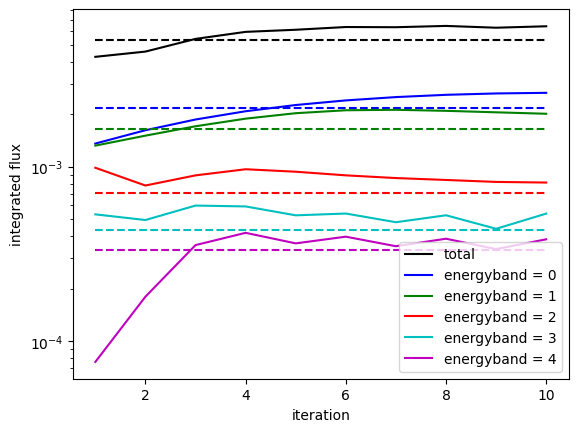

In [30]:
iteration = []
integrated_flux = []
integrated_flux_each_band = [[],[],[],[],[]]

for _ in all_result:
    iteration.append(_['iteration'])
    image = _['model_map']

    integrated_flux.append( np.sum(image) / image.unit)

    for energy_band in range(5):
        integrated_flux_each_band[energy_band].append( np.sum(image[:,energy_band]) / image.unit)
        
plt.plot(iteration, integrated_flux * pixel_area, label = 'total', color = 'black')
plt.plot(iteration, np.full(len(iteration), integrated_flux_truth), color = 'black', linestyle = "--")
plt.xlabel("iteration")
plt.ylabel("integrated flux")
plt.yscale("log")


colors = ['b', 'g', 'r', 'c', 'm']
for energy_band in range(5):
    plt.plot(iteration, integrated_flux_each_band[energy_band] * pixel_area, label = "energyband = {}".format(energy_band), color = colors[energy_band])
    plt.plot(iteration, np.full(len(iteration), integrated_flux_each_band_truth[energy_band]), color = colors[energy_band], linestyle = "--")
    
plt.legend()